# Exercício 1 - Ligações para o 911

### Nos EUA, o número 911 é destinado à emergências. O [Kaggle](https://www.kaggle.com/mchirico/montcoalert) disponibilizou dados de ligações para o serviço:

* lat: Variável String, Latitude
* lng: Variável String, Longitude
* desc: Variável String, Descrição da Chamada de Emergência
* zip: Variável String, CEP
* título: Variável String, Título
* timeStamp: Variável String, AAAA-MM-DD HH: MM: SS
* twp: Variável String, Township
* addr: Variável String, Endereço
* e: Variável String, variável Dummy (sempre 1)



### Leia o arquivo csv (911.csv) como um dataframe chamado _calls_

In [50]:
import numpy as np
import pandas as pd

call = pd.read_csv('911.csv')
call.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


### Quantas linhas e colunas tem o arquivo? Qual a quantidade de memória necessária para carregá-lo?

In [22]:
call.shape

(99492, 9)

In [54]:
call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


### Quais são os top 5 CEPs nas chamadas 911?

In [56]:
df = call.groupby(by=['zip']).count()
df.sort_values(['lat'], ascending=[False])

call.zip.value_counts().head(5)


19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Quais são os 5 principais municípios nas chamadas 911?

In [57]:
call.twp.value_counts().head(5)


LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### Quantos códigos de título únicos existem?

In [59]:
df = call['title']
a = df.unique()
a.shape

b = df.nunique()
b

110

### Na coluna _title_ existem Razões / Departamentos especificados antes do código do título. Estes são _"EMS", "Fire"  e  "Traffic"_. Crie uma nova coluna chamada _Reason_ que conterá esse valor em cada linha

#### Por exemplo, se o valor da coluna do título for EMS: BACK PAINS / BLESSOR, o valor da coluna Reason será EMS.

In [67]:
# call['Reason'] = np.char.split(call['title'], ':')[0]
call['Reason'] = call.title.apply(lambda title: title.split(':')[0])
call

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


### Qual é a razão mais comum para uma chamada do 911 com base nessa nova coluna?

In [68]:
call.Reason.value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

<AxesSubplot:ylabel='Reason'>

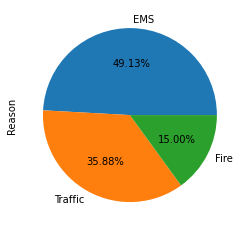

In [73]:
call.Reason.value_counts().plot(kind='pie', autopct='%.2f%%')

<AxesSubplot:>

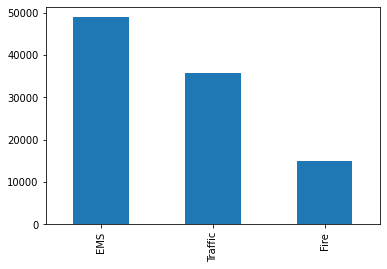

In [75]:
call.Reason.value_counts().plot(kind='bar')

### Qual é o tipo de dados dos objetos na coluna *timeStamp*?

In [80]:
type(call.timeStamp[0])


pandas._libs.tslibs.timestamps.Timestamp

### Converta a coluna _timeStamp_ para DateTime. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) para essa operação.

In [85]:

call.timeStamp = pd.to_datetime(call.timeStamp)


### Crie 3 novas colunas chamadas _Hour, Month e Day of Week_. Você criará essas colunas com base na coluna timeStamp

In [86]:
# call.timeStamp.dt.month
# call.timeStamp.dt.hour
# call.timeStamp.dt.dayofweek

# call['Reason'] = call.title.apply(lambda title: title.split(':')[0])


call['month'] = call.timeStamp.apply(lambda timeStamp: timeStamp.dt.month)
call['hour'] = call.timeStamp.apply(lambda timeStamp: timeStamp.dt.hour)
call['dayofweek'] = call.timeStamp.apply(lambda timeStamp: timeStamp.dt.dayofweek)


AttributeError: 'Timestamp' object has no attribute 'dt'

### Observe como o dia da demana é um número inteiro de 0-6. Mapeie os nomes das seqüências reais para o dia da semana, nessa mesma coluna:

- 0 => Mon
- 1 => Tue
- 2 => Wed
- 3 => Thu
- 4 => Fri
- 5 => Sat
- 6 => Sun

In [ ]:
call.dayofweek.replace([0,1,2,3,4,5,6], ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

### Qual a quantidade de chamadas de cada motivo (*Reason*) por mês?

In [84]:
call.groupby(['month', 'Reason'])
gb.size()

KeyError: 'month'

### Qual foi o dia com a maior quantidade de chamadas? Quantas chamadas foram executadas neste dia?

### Levando-se em consideração apenas atendimentos feitos às sextas-feiras, qual a hora do dia com o maior número de chamadas?

### Levando-se em consideração os atendimentos relacionados a incêndio (*Reason* = *Fire*) qual a quantidade de chamados aos sábados?